# Sets
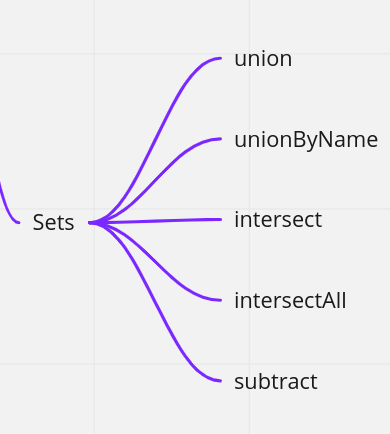

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import Window

# Create SparkSession
spark = (SparkSession.builder
                    .appName('PySparkSyntax')
                    .getOrCreate()
        )

In [ ]:
# Cria o primeiro DataFrame
df1 = spark.createDataFrame([(1, "João"), (2, "Maria"), (3, "Pedro")], ["id", "nome"])

df1 = df1.withColumn("origem", F.lit("df1"))

df1.toPandas()

In [ ]:
# Cria o segundo DataFrame
df2 = spark.createDataFrame([("José", 4), ("Ana", 5), ("Marta", 6)], ["nome", "id"])

# Adiciona uma coluna "origem" para identificar de qual DataFrame os dados vieram
df2 = df2.withColumn("origem", F.lit("df2"))

df2.toPandas()

In [ ]:
# Cria o terceiro DataFrame
df3 = spark.createDataFrame([(1, "João", 30), (2, "Maria", 27), (3, "Pedro", 15)], ["id", "nome", "idade"])

df3 = df3.withColumn("origem", F.lit("df3"))

df3.toPandas()

# [union](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.unionAll.html#pyspark.sql.DataFrame.unionAll)

DataFrame.unionAll(other: pyspark.sql.dataframe.DataFrame) → pyspark.sql.dataframe.DataFrame

Return a new DataFrame containing union of rows in this and another DataFrame.

Also as standard in SQL, this function resolves columns by position (not by name).

In [ ]:
# Une os dois DataFrames
df_union = df1.union(df2)

# Exibe o resultado
df_union.toPandas()

In [ ]:
# Une os dois DataFrames
df_union = df1.union(df3)

# Exibe o resultado
df_union.toPandas()

## [unionByName](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.unionByName.html#pyspark.sql.DataFrame.unionByName)

DataFrame.unionByName(other: pyspark.sql.dataframe.DataFrame, allowMissingColumns: bool = False) → pyspark.sql.dataframe.DataFrame

Returns a new DataFrame containing union of rows in this and another DataFrame.

In [ ]:
# Une os dois DataFrames
df_unionByName = df1.unionByName(df2)

# Exibe o resultado
df_unionByName.toPandas()

In [ ]:
# Une os dois DataFrames
df_unionByName = df1.unionByName(df3)

# Exibe o resultado
df_unionByName.toPandas()

In [ ]:
# Une os dois DataFrames
df_unionByName = df1.unionByName(df3, True)

# Exibe o resultado
df_unionByName.toPandas()

## [intersect](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.intersect.html)

DataFrame.intersect(other: pyspark.sql.dataframe.DataFrame) → pyspark.sql.dataframe.DataFrame

Return a new DataFrame containing rows only in both this DataFrame and another DataFrame.

This is equivalent to INTERSECT in SQL.

In [ ]:
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("city", StringType(), True)
])


# Create a DataFrame using the schema
data = [("Alice", 25, "New York")
        , ("Bob", 30, "San Francisco")
        , ("Bob", 12, "Las Vegas")
        , ("Charlie", 35, "Chicago")
        , ("Charlie", 35, "Chicago")]
df1 = spark.createDataFrame(data, schema)

df1.toPandas()

In [ ]:
# Create a DataFrame using the schema
data = [("Alice", 25, "New York")
        ,("Alice", 55, "Miami")
        , ("Bob", 30, "San Francisco")
        , ("Charlie", 35, "Chicago")
        , ("Charlie", 35, "Chicago")]
df2 = spark.createDataFrame(data, schema)

df2.toPandas()

In [ ]:
schema = StructType([
    StructField("city", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("name", StringType(), True)
])


# Create a DataFrame using the schema
data = [("New York", 25, "Alice")
        , ("San Francisco", 30, "Bob")
        , ("Las Vegas", 12, "Bob")
        , ("Chicago", 35, "Charlie")
        , ("Chicago", 35, "Charlie")]
df3 = spark.createDataFrame(data, schema)

df3.toPandas()

In [ ]:
df_intersect = df1.intersect(df2)
df_intersect.toPandas()

In [ ]:
df_intersect = df1.intersect(df3)
df_intersect.toPandas()

## [intersectAll](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.intersectAll.html)

DataFrame.intersectAll(other: pyspark.sql.dataframe.DataFrame) → pyspark.sql.dataframe.DataFrame

Return a new DataFrame containing rows in both this DataFrame and another DataFrame while preserving duplicates.

This is equivalent to INTERSECT ALL in SQL. As standard in SQL, this function resolves columns by position (not by name).

In [ ]:
df_intersectAll = df1.intersectAll(df2)
df_intersectAll.toPandas()

In [ ]:
df_intersectAll = df1.intersectAll(df3)
df_intersectAll.toPandas()

## [subtract](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.subtract.html)

DataFrame.subtract(other: pyspark.sql.dataframe.DataFrame) → pyspark.sql.dataframe.DataFrame

Return a new DataFrame containing rows in this DataFrame but not in another DataFrame.

This is equivalent to EXCEPT DISTINCT in SQL.

In [ ]:
df_subtract = df1.subtract(df2)
df_subtract.toPandas()

In [ ]:
df_subtract = df1.subtract(df3)
df_subtract.toPandas()